# Бэггинг и случайный лес

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).
Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

Если вам захочется ускорить вычисление cross_val_score - можете попробовать использовать параметр n_jobs.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn

In [23]:
# your code
X, y = load_digits(return_X_y=True)

### Шаг 1
Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score.

In [28]:
clf = DecisionTreeClassifier()

print(cross_val_score(clf, X, y, cv = 10, n_jobs=-1).mean())

0.8190937306021105


### Шаг 2

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

In [45]:
bclf = BaggingClassifier(estimator=clf, n_jobs=-1, n_estimators=100, random_state=69)

print(cross_val_score(bclf, X, y, cv=10, n_jobs=-1).mean())

0.9175977653631285


### Шаг 3
Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [46]:
bclf = BaggingClassifier(estimator=clf, n_jobs=-1, n_estimators=100, max_features= int((X.shape[1])**0.5), random_state=69)

print(cross_val_score(bclf, X, y, cv=10, n_jobs=-1).mean())

0.926564245810056


### Шаг 4
Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков.

In [ ]:
clf = DecisionTreeClassifier(random_state=69)
bclf = BaggingClassifier(estimator=clf, n_jobs=-1, n_estimators=100, max_features= int((X.shape[1])**0.5))

print(cross_val_score(bclf, X, y, cv=10, n_jobs=-1).mean())

0.9321166977032898


### Шаг 5

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности постройте графики зависимости качества от значений параметров.

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера

  1. Случайный лес сильно переобучается с ростом количества деревьев
  2. При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев
  3. С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.
  4. При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.
  5. При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.
  6. При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.
  7. При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [ ]:
"""
    Правильные ответы: 2, 3, 4, 7
"""

#### Зависимость от количества деревьев

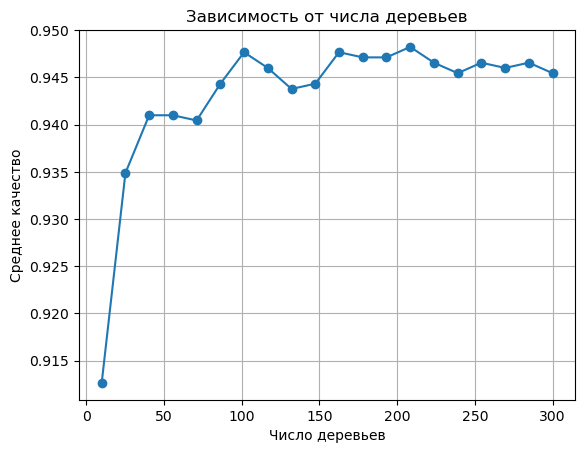

In [51]:
n_estimators = np.linspace(10, 300, 20)
res = []

for estimator in n_estimators:
    clf = RandomForestClassifier(n_estimators= int(estimator), random_state=69, n_jobs=-1)
    res.append(cross_val_score(clf, X, y, cv=10, n_jobs=-1).mean())


plt.figure()
plt.plot(n_estimators, res, marker='o')
plt.title("Зависимость от числа деревьев")
plt.xlabel("Число деревьев")
plt.ylabel("Среднее качество")
plt.grid()
plt.show()


#### Зависимость от количества признаков

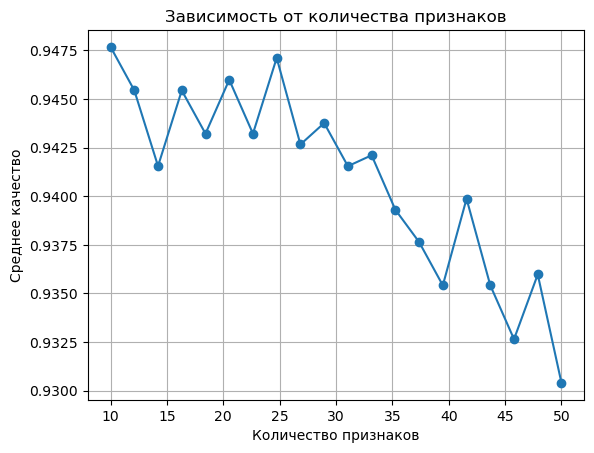

In [59]:
max_features = np.linspace(10, 50, 20)
res = []

for feature in max_features:
    clf = RandomForestClassifier(max_features=int(feature), random_state=69, n_jobs=-1)
    res.append(cross_val_score(clf, X, y, cv=10, n_jobs=-1).mean())


plt.figure()
plt.plot(max_features, res, marker='o')
plt.title("Зависимость от количества признаков")
plt.xlabel("Количество признаков")
plt.ylabel("Среднее качество")
plt.grid()
plt.show()


#### Зависимость от глубины деревьев

10


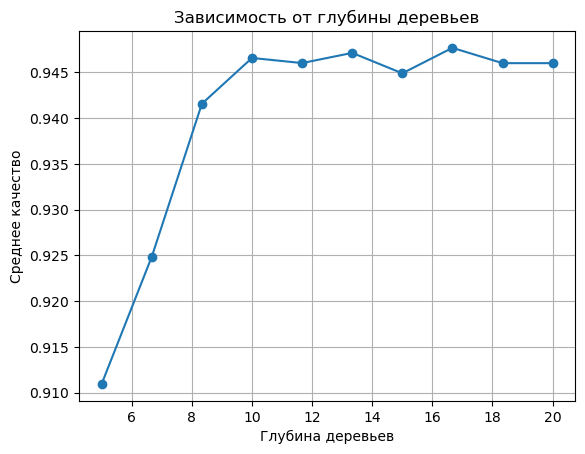

In [60]:
max_depth = np.linspace(5, 20, 10)
res = []

for depth in max_depth:
    clf = RandomForestClassifier(max_depth=int(depth), random_state=69, n_jobs=-1)
    res.append(cross_val_score(clf, X, y, cv=10, n_jobs=-1).mean())


print(len(res))
plt.figure()
plt.plot(max_depth, res, marker='o')
plt.title("Зависимость от глубины деревьев")
plt.xlabel("Глубина деревьев")
plt.ylabel("Среднее качество")
plt.grid()
plt.show()
